# Семинар 12. Свертки

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from matplotlib import cm
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline

Загрузим квокку!

In [2]:
!wget -O quokka.jpg https://www.meme-arsenal.com/memes/5851dce2a0718490da96a3819221a01a.jpg

--2021-12-14 11:50:22--  https://www.meme-arsenal.com/memes/5851dce2a0718490da96a3819221a01a.jpg
Resolving www.meme-arsenal.com... 2606:4700:20::681a:f0, 2606:4700:20::681a:1f0, 2606:4700:20::ac43:4aa7, ...
Connecting to www.meme-arsenal.com|2606:4700:20::681a:f0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31109 (30K) [image/jpeg]
Saving to: 'quokka.jpg'

quokka.jpg          100%[===================>]  30.38K  --.-KB/s    in 0.006s  

2021-12-14 11:50:22 (4.81 MB/s) - 'quokka.jpg' saved [31109/31109]



Image format: JPEG; shape: (300, 300); color scheme: RGB


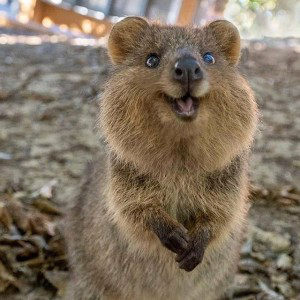

In [3]:
# !pip install Pillow
from PIL import Image

img = Image.open("quokka.jpg")
print(f"Image format: {img.format}; shape: {img.size}; color scheme: {img.mode}")
img

Мы знаем, что цветное изображение состоит из 3 числовых матриц или трехмерного тензора. Каждая матрица соответствует одному из 3 базовых цветов: красному, зеленому и синему.

Image matrix shape: (300, 300, 3)


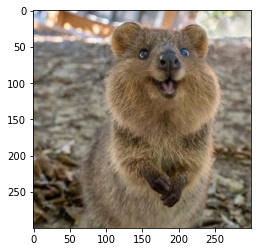

In [4]:
# получаем тензор
img_matrix = np.array(img)

# (высота, ширина, число каналов)
print(f"Image matrix shape: {img_matrix.shape}")

plt.imshow(img_matrix)
plt.show()

## Операция свертки

В PyTorch свёрточный слой представлен в модуле `nn` функцией [`Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html).

Нам пригодится знать про эти параметры: 

- количество входных каналов `in_channels`
- количество выходных каналов `out_channels`
- размер ядра `kernel_size`
- шаг `stride`
- паддинг `padding`

**Размер ядра** - `int`, если ядро квадратное и кортеж из двух чисел, если ядро прямоугольное. Задает размер фильтра, с которым производится свертка изображения.

![no_padding_no_strides.gif](no_padding_no_strides.gif)

Эта и следующие анимации взяты [здесь](https://github.com/vdumoulin/conv_arithmetic)

**Шаг** - задает шаг, в пикселях, на который сдвигается фильтр. `int`, если по горизонтали и вертикали сдвигается на одно и то же число. Кортеж из двух чисел, если сдвиги разные.

![no_padding_strides.gif](no_padding_strides.gif)

Шаг: 2

**Паддинг** - количество пикселей, которыми дополняется изображение. Аналогично шагу и размеру ядра, может быть, как `int`, так и кортежем из двух чисел.

**Half pading**
![same_padding_no_strides.gif](same_padding_no_strides.gif)

### Свертка изображения


Применим оператор Собеля для детектирования границ на изображении.

Откуда взялись эти цифры и почему с ними подсвечиваются границы, можно посмотреть [здесь](https://nrsyed.com/2018/02/18/edge-detection-in-images-how-to-derive-the-sobel-operator/)

In [5]:
import torch
from torch.nn.functional import conv2d

Конвертируем изображение в нужный формат для PyTorch

In [6]:
img_tensor = torch.tensor([img_matrix], dtype=torch.float)
img_tensor.size()  # (число изображений, высота, ширина, число каналов)

torch.Size([1, 300, 300, 3])

In [7]:
img_tensor = img_tensor.permute(0, 3, 1, 2)
img_tensor.size()  # (число изображений, число каналов, высота, ширина)

torch.Size([1, 3, 300, 300])

Зададим оператор Собеля для детектирования горизонтальных границ

In [8]:
sobel_hor = [[-1, -2, -1], 
             [ 0,  0,  0], 
             [ 1,  2,  1]]

# одна матрица на каждый канал картинки
kernels  = [[sobel_hor, sobel_hor, sobel_hor]]
kernels = torch.tensor(kernels, dtype=torch.float)
kernels.size() # (число выходных каналов, число входных каналов, высота, ширина)

torch.Size([1, 3, 3, 3])

In [9]:
# свернём картинку с подготовленным ядром свёртки
img_conv_hor = conv2d(img_tensor, kernels)
img_conv_hor = img_conv_hor.permute(0, 2, 3, 1)
img_conv_hor.size()  # (число изображений, высота, ширина, число каналов)

torch.Size([1, 298, 298, 1])

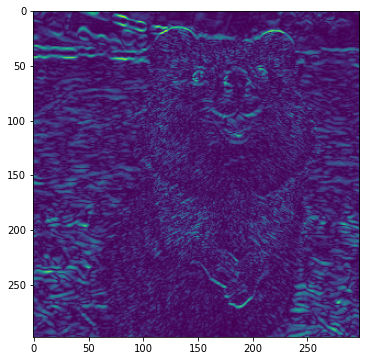

In [12]:
plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(torch.abs(img_conv_hor[0, :, :, 0]))
plt.show()

Зададим оператор Собеля для детектирования вертикальных границ

In [13]:
sobel_ver = [[-1, 0, 1], 
             [-2, 0, 2], 
             [-1, 0, 1]]

# одна матрица на каждый канал картинки
kernel  = [[sobel_ver, sobel_ver, sobel_ver]]
kernel = torch.tensor(kernel, dtype=torch.float)
kernel.size() #(число выходных каналов, число входных каналов, высота, ширина)

torch.Size([1, 3, 3, 3])

In [14]:
img_conv_ver = conv2d(img_tensor, kernel)

img_conv_ver = img_conv_ver.permute(0, 2, 3, 1)
img_conv_ver.size() #(число изображений, высота, ширина, число каналов)

torch.Size([1, 298, 298, 1])

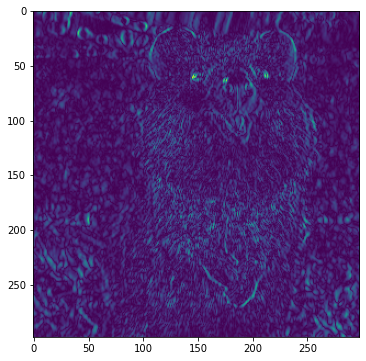

In [15]:
plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(torch.abs(img_conv_ver[0, :, :, 0]))
plt.show()

Объединим два изображения

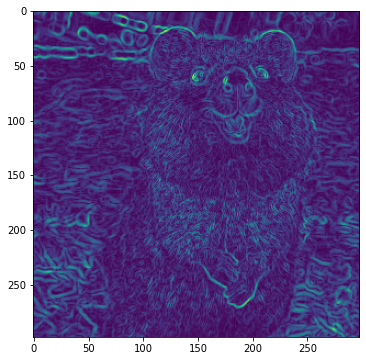

In [16]:
img_conv = torch.sqrt(img_conv_ver ** 2 + img_conv_hor ** 2)

plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(img_conv[0, :, :, 0])
plt.show()

### Задание 1
По аналогии с примером выше, сверните изображение со случайным ядром такого же размера.

**Подсказка:** используйте `torch.rand()`.

In [ ]:
### your code here

# свертка изображения
img_conv_ver = conv2d(img_tensor, kernels_random)
img_conv_ver = img_conv_ver.permute(0, 2, 3, 1)

# рисуем результат
plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(img_conv_ver[0, :, :, 0])
plt.show()

### Полносвязная нейронная сеть


In [ ]:
import torch.nn.functional as F
import torchvision

from torch import nn
from torchvision import transforms

Будем работать с датасетом [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), в котором содержатся изображения 10 классов размером 32 на 32 пикселя с тремя каналами. В тренировочной выборке 50000 изображений, а в тестовой 10000.

In [ ]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(
    root="./cifar", 
    train=True,                             
    download=True, 
    transform=transform
)
valset = torchvision.datasets.CIFAR10(
    root="./cifar", 
    train=False,
    download=True, 
    transform=transform
)

train_dataloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=16,
    shuffle=True, 
    num_workers=1
)
val_dataloader = torch.utils.data.DataLoader(
    valset, 
    batch_size=16,
    shuffle=False, 
    num_workers=1
)

0it [00:00, ?it/s]

Files already downloaded and verified


In [ ]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
images, labels = next(iter(train_dataloader))

plt.figure(figsize=(12,12))
# create grid of images
img_grid = torchvision.utils.make_grid(images)
# show images
matplotlib_imshow(img_grid, one_channel=False)

Обучаем полносвязную нейронную сеть для классификации изображений. Она будет работать долго и не классно.

In [ ]:
model = nn.Sequential(
    nn.Flatten(),             
    nn.Linear(32 * 32 * 3, 512),  
    nn.ReLU(),  
    nn.Linear(512, 128), 
    nn.ReLU(),  
    nn.Linear(128, 10),       
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # создаем оптимизатор и передаем туда параметры модели

In [ ]:
def train(model, optimizer, n_epochs=5):
    for epoch in range(n_epochs):
        
        # тренировка
        pbar = tqdm(train_dataloader)
        for x_train, y_train in pbar:
            y_pred = model(x_train)
            loss = F.cross_entropy(y_pred, y_train)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            pbar.set_description(f'Loss {loss.data}')

        # валидация
        if epoch % 2 == 0:
            val_loss = []
            val_accuracy = []
            with torch.no_grad():
                for x_val, y_val in tqdm(val_dataloader):
                    y_pred = model(x_val)
                    loss = F.cross_entropy(y_pred, y_val)
                    val_loss.append(loss.numpy())
                    val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val))
                
            # печатаем метрики
            print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

In [ ]:
train(model, optimizer)

  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch: 0, loss: 1.578218698501587, accuracy: 0.4455


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch: 2, loss: 1.4013235569000244, accuracy: 0.5074


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch: 4, loss: 1.3576728105545044, accuracy: 0.5221


### Сверточный слой

Добавим в нашу сеть сверточный слой.

In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5), 
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),  
    nn.Flatten(),                 
    nn.Linear(7 * 7 * 10, 128),       
    nn.ReLU(),                    
    nn.Linear(128, 10)        
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
train(model, optimizer)

  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch: 0, loss: 1.4431393146514893, accuracy: 0.4861


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch: 2, loss: 1.221283197402954, accuracy: 0.5665


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch: 4, loss: 1.0898840427398682, accuracy: 0.6201


### Задание 2 (домашка)

По аналогии с предыдущим примером, обучите нейронную сеть, у которой следущие слои:

- Сверточный слой с 10 ядрами размером 5
- Функция активации ReLU
- Уменьшить картинку в 2 раза (по каждому измерению)
- Сверточный слой с 20 ядрами размером 5
- Функция активации ReLU
- Уменьшить картинку в 2 раза (по каждому измерению)
- Полносвязный слой со 128 нейронами
- Функция активации ReLU
- Выходной слой

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        pass
        
    def forward(self, x):
        pass

In [ ]:
model = MyModel()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
train(model, optimizer)

### Наконец напишем нормальный класс для обучения 

прям как мы любим)))

In [21]:
from torch.utils.data import Dataset, DataLoader
from copy import deepcopy

Логировать будем в wandb

In [22]:
class Trainer:
    def __init__(self, model: nn.Module,
                 optimizer,
                 criterion, 
                 train_dataset: Dataset,
                 val_dataset: Dataset,
                 batch_size: int = 16,
                 log_wandb: bool = True):
        self.model = model
        self.optimizer = optimizer
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.batch_size = batch_size
        self.log_wandb = log_wandb

        self.device = 'cpu'
        if torch.cuda.is_available():
            self.device = torch.cuda.current_device()
            self.model = self.model.to(self.device)


    def save_checkpoint(self, path, epoch, loss):
        torch.save({
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),  
            'loss': loss
        }, path)
        

    def train(self, num_epochs: int):
        model = self.model
        optimizer = self.optimizer

        train_loader = DataLoader(self.train_dataset, shuffle=True, pin_memory=True, batch_size=self.batch_size)
        val_loader = DataLoader(self.val_dataset, shuffle=False, pin_memory=True, batch_size=self.batch_size)
        best_loss = float('inf')

        for epoch in range(num_epochs):
            model.train()
            train_bar = tqdm(train_loader)
            for image, labels in train_bar:
                image, labels = image.to(self.device), labels.to(self.device)
                prediction = model(image)
                loss = criterion(prediction, labels)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                train_bar.set_description(f'Loss {loss.data}')
                
                if self.log_wandb:
                    wandb.log({"train loss": loss})

            model.eval()
            val_losses = []
            val_accuracy = []
            for image, labels in tqdm(val_loader):
                image, labels = image.to(self.device), labels.to(self.device)
                prediction = model(image)
                loss = criterion(prediction, labels)
                val_losses.append(loss.item())
                val_accuracy.extend((torch.argmax(prediction, dim=-1) == labels).cpu().numpy())
                


            val_loss = np.mean(val_losses)
            val_acc = np.mean(val_accuracy)
            
            if self.log_wandb:
                    wandb.log({"val_loss": val_loss,
                              "val_acc": val_acc})
            print(f'Validation loss {val_loss} after epoch {epoch}')
            print(f'Validation accuracy {val_acc} after epoch {epoch}')

            if val_loss < best_loss:
                self.save_checkpoint("./best_checkpoint.pt", epoch, val_loss)
                best_loss = val_loss

Затестим на одном VGG блоке.

In [ ]:
class ModelBaseline(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc =  nn.Sequential(
            nn.Flatten(),
            nn.Linear(2704, 128),
            nn.ReLU()
        )
        self.prediction = nn.Sequential(
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.vgg(x)
        x = self.fc(x)
        x = self.prediction(x)
        return x
    
model_baseline = ModelBaseline()
optimizer = torch.optim.SGD(model_baseline.parameters(), lr=0.001, momentum=0.9)
criterion =  nn.CrossEntropyLoss()

In [ ]:
trainer = Trainer(model_baseline, optimizer, criterion, trainset, valset)

In [ ]:
import wandb

wandb.login()

config = dict(model='VGG',
             learning_rate=0.001,
             data='CIFAR10')


wandb.init(project="sem12",
           notes="cnn-vgg",
           config=config)


wandb.watch(model);

wandb: Currently logged in as: asyakarpova (use `wandb login --relogin` to force relogin)


In [ ]:
trainer.train(5)

  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Validation loss 1.5034754077911376 after epoch 0
Validation accuracy 0.4548 after epoch 0


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Validation loss 1.3202824522972108 after epoch 1
Validation accuracy 0.5208 after epoch 1


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Validation loss 1.2155629776000976 after epoch 2
Validation accuracy 0.5686 after epoch 2


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Validation loss 1.1809065402030945 after epoch 3
Validation accuracy 0.5775 after epoch 3


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Validation loss 1.096249002122879 after epoch 4
Validation accuracy 0.6113 after epoch 4


Восстановим чекпоинт

In [ ]:
checkpoint = torch.load('best_checkpoint.pt')
model = 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

model.eval()

### Аугментация изображений 

С помощью поворотов, отражения, добавления шума, сдвигов и других преобразований, картинка немного меняется, однако сохраняет свою прежнюю метку. С помощью функции Compose можно объединять несколько трансформаций изображения, а потом применять их при чтении датасета. Полный список аугментаций доступен [тут](https://pytorch.org/vision/stable/transforms.html). Изучите его и поэкспериментируйте с различными трансформациями изображения

In [ ]:
import PIL

transform = transforms.Compose(
    [
        transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(
    root="./cifar", 
    train=True,                             
    download=True, 
    transform=transform
)
valset = torchvision.datasets.CIFAR10(
    root="./cifar", 
    train=False,
    download=True, 
    transform=transform
)

train_dataloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=16,
    shuffle=True, 
    num_workers=1
)
val_dataloader = torch.utils.data.DataLoader(
    valset, 
    batch_size=16,
    shuffle=False, 
    num_workers=1
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
images, labels = next(iter(train_dataloader))

plt.figure(figsize=(12,12))
# create grid of images
img_grid = torchvision.utils.make_grid(images)
# show images
matplotlib_imshow(img_grid, one_channel=False)

### Как еще улучшить качество модели?

Особенность VGG блока заключается в том, что повышение качества работы сети достигается увеличением числа последовательных блоков. При этом число фильтров в каждом новом блоке в два раза больше, чем в предыдущем. Давайте попробуем объединить 3 VGG блока.


#### Dropout

https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf

Если сеть имеет сложную архитектуру, то возможно переобучение - процесс, в котором модель слишком сильно подстраивается под тренировочную выборку и потом дает заниженное качество на тестовой. Для борьбы с этим в нейросетях используют Dropout.


<img src="https://files.ai-pool.com/a/59df0e2cc98add51893f784916195478.png" alt="bn" width="400"/>

#### BatchNorm

https://arxiv.org/pdf/1502.03167.pdf

Для ускорения и стабилизации обучения добавляют BatchNorm.

<img src="https://kratzert.github.io/images/bn_backpass/bn_algorithm.PNG" alt="bn" width="400"/>

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 16, 3, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.Conv2d(16, 16, 3, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(0.2),

    nn.Conv2d(16, 32, 3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 32, 3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(0.2),

    nn.Conv2d(32, 64, 3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64, 64, 3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(0.2),

    nn.Flatten(),
    nn.Linear(64 * 4 * 4, 128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 10),
)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion =  nn.CrossEntropyLoss()

In [ ]:
trainer = Trainer(model, optimizer, criterion, trainset, valset, log_wandb=True)

In [ ]:
config = dict(model='improved VGG',
             learning_rate=0.001,
             data='CIFAR10')


wandb.init(project="sem12_vgg",
           notes="cnn-vgg",
           config=config)


wandb.watch(model);

In [ ]:
trainer.train(5)

### Задание 3 (Домашка). Реализуйте архитектуру с картинки. 

Детали (типо размера сверток) возьмите из оригинальной статьи. https://arxiv.org/pdf/1409.1556.pdf

<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-2.png" alt="bn" width="600"/>

## Transfer Learning

Задачу ниже точно лучше решать с GPU.

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip && unzip kagglecatsanddogs_3367a.zip > /dev/null
    
!rm -rf ./PetImages/Cat/666.jpg ./PetImages/Dog/11702.jpg

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Normalize, Resize, ToTensor 
import torch

dataset = ImageFolder(
    "./PetImages", 
    transform=Compose(
        [
            Resize((224, 224)), 
            ToTensor(), 
            Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]), 
        ]
    )
)
trainset, valset = torch.utils.data.random_split(
    dataset, 
    [int(0.8 * len(dataset)), len(dataset) - int(0.8 * len(dataset))]
)

In [ ]:
import glob
import numpy as np 
import matplotlib.pyplot as plt

image = np.random.choice(glob.glob("./PetImages/*/*.jpg"))
plt.imshow(plt.imread(image))

In [ ]:
from torchvision.models import resnet18

# Загрузить предобученную сеть — pretrained=True
model = resnet18(pretrained=True)

In [15]:
for param in model.parameters():
    param.requires_grad = False

In [17]:
model.fc = nn.Linear(512, 2)

In [27]:
optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
criterion =  nn.CrossEntropyLoss()

trainer = Trainer(model, optimizer, criterion, trainset, valset, log_wandb=True)

In [ ]:
trainer.train(2)

In [39]:
### todo
# сделать прогноз лэйбла картинки предобученной моделью без файн-тьюнинга

### Атаки

In [ ]:
!wget -O 'elephant.jpg' https://files.worldwildlife.org/wwfcmsprod/images/African_Elephant_Kenya_112367/story_full_width/qxyqxqjtu_WW187785.jpg

In [ ]:
import PIL
import numpy as np


elephant = PIL.Image.open('elephant.jpg')
transformed_elephant = # todo

In [62]:
from torch import topk
from torch.nn import CrossEntropyLoss

In [107]:
import json
class_idx = json.load(open("imagenet_class_index.json"))

In [13]:
cls_idx = {int(key): values[1] for key, values in class_idx.items()}

In [ ]:
def naive_attack(init_tensor, target, num_iters=10, epsilon=1e-5):
    x = init_tensor.clone().detach()
    x.requires_grad = True
    # code

In [ ]:
naive_attack(transformed_elephant, 0, epsilon=100)

In [ ]:
def fgsm_attack(init_tensor, target, num_iters=10, epsilon=1e-5):
    x = init_tensor.clone().detach()
    x.requires_grad = True
    # code

**Main sources**:

 - https://github.com/m12sl/dl-hse-2021/blob/main/03-training/seminar.ipynb
    
 - https://github.com/hse-ds/iad-deep-learning/blob/master/2021/seminars/sem03/sem03_task.ipynb
 
 - https://github.com/hse-ds/iad-deep-learning/blob/master/2021/seminars/sem05/sem05_task.ipynb
        